# Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import re
from collections import Counter

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# Set Seaborn style
sns.set() 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


### Load dataset

In [4]:
with open("20th_century_events.txt", "r", encoding="utf-8") as file:
    text = file.read()  

# Create bar chart

In [9]:
# Tokenize using regex instead of nltk's punkt
tokens = re.findall(r'\b\w+\b', text.lower())  # all words only, lowercase

# Count the 10 most common words
word_counts = Counter(tokens)
common_words = word_counts.most_common(10)

# Create a DataFrame
df_common = pd.DataFrame(common_words, columns=["Word", "Count"]) 

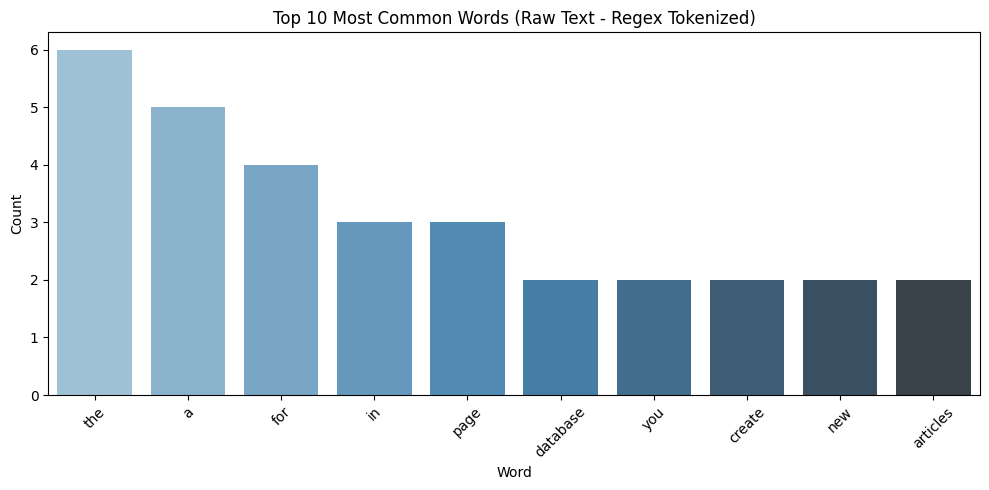

In [7]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df_common, x="Word", y="Count", hue="Word", palette="Blues_d", legend=False)
plt.title("Top 10 Most Common Words (Raw Text - Regex Tokenized)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show() 

# Remove stop words 

In [12]:
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Filter tokens
filtered_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

# Count again
filtered_counts = Counter(filtered_tokens)
filtered_common = filtered_counts.most_common(10)

# Convert to DataFrame
df_filtered = pd.DataFrame(filtered_common, columns=["Word", "Count"])

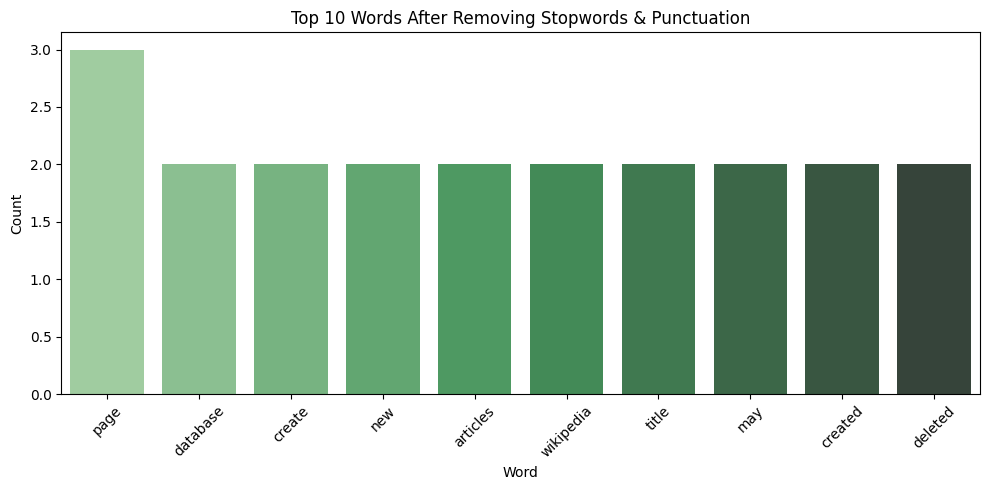

In [13]:
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_filtered, x="Word", y="Count", hue="Word", palette="Greens_d", legend=False)
plt.title("Top 10 Words After Removing Stopwords & Punctuation")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### After removing stopwords and punctuation, the most frequent words are now more meaningful and specific. Generic words like "the", "and", "in" have been eliminated, revealing terms that better reflect the actual topics and themes within the dataset. This makes the analysis more insightful. 

# Tags list 

In [17]:
# use clean token
blob = TextBlob(" ".join(filtered_tokens)) 
tags = blob.tags
print(tags[:20])

[('wiktionary', 'JJ'), ('dictionary', 'JJ'), ('wikibooks', 'NNS'), ('textbooks', 'VBP'), ('wikiquote', 'JJ'), ('quotations', 'NNS'), ('wikisource', 'VBP'), ('library', 'JJ'), ('wikiversity', 'NN'), ('learning', 'VBG'), ('resources', 'NNS'), ('commons', 'NNS'), ('media', 'NNS'), ('wikivoyage', 'VBP'), ('travel', 'JJ'), ('guide', 'NN'), ('wikinews', 'VBZ'), ('news', 'NN'), ('source', 'NN'), ('wikidata', 'NN')]


# Top 10 POS tags

In [18]:
# Count POS tags
pos_counts = Counter(tag for word, tag in tags)

# Get top 10 most common POS tags
top10_pos = pos_counts.most_common(10)

# Convert to DataFrame
df_pos = pd.DataFrame(top10_pos, columns=["POS", "Count"])
print(df_pos) 

   POS  Count
0   NN     37
1   JJ     15
2  NNS     12
3  VBP     10
4  VBD      5
5   RB      5
6  VBG      4
7   VB      4
8  VBZ      2
9   MD      2


# Plot POS Tag Frequencies with Seaborn

<AxesSubplot: xlabel='POS', ylabel='Count'>

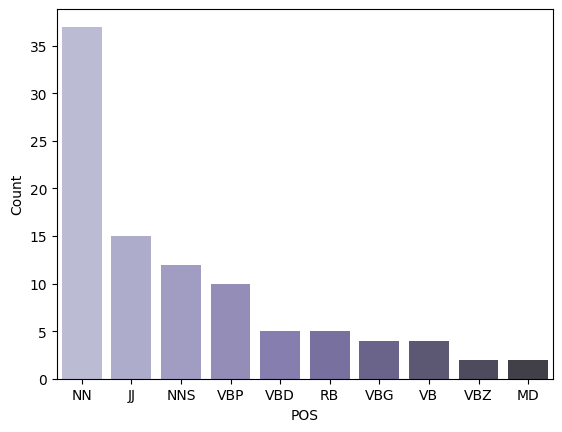

In [21]:
sns.barplot(data=df_pos, x="POS", y="Count", hue="POS", palette="Purples_d", legend=False) 

#  Three bar plots with top 15 POS labels

In [22]:
# Reuse the full tag list from TextBlob
nouns = [word for word, tag in tags if tag.startswith("NN")]
verbs = [word for word, tag in tags if tag.startswith("VB")]
adjectives = [word for word, tag in tags if tag.startswith("JJ")]

# Count top 15 for each
noun_counts = Counter(nouns).most_common(15)
verb_counts = Counter(verbs).most_common(15)
adj_counts = Counter(adjectives).most_common(15)

# Convert to DataFrames
df_nouns = pd.DataFrame(noun_counts, columns=["Word", "Count"])
df_verbs = pd.DataFrame(verb_counts, columns=["Word", "Count"])
df_adjs = pd.DataFrame(adj_counts, columns=["Word", "Count"])

#### Plot Each POS Type

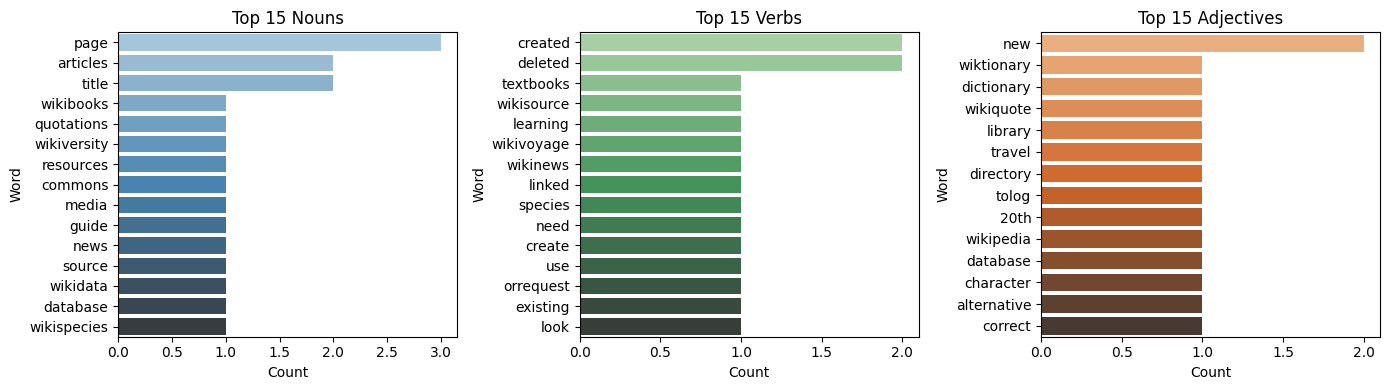

In [24]:
plt.figure(figsize=(14, 4))

# Nouns
plt.subplot(1, 3, 1)
sns.barplot(data=df_nouns, x="Count", y="Word", hue="Word", palette="Blues_d", legend=False)
plt.title("Top 15 Nouns")

# Verbs
plt.subplot(1, 3, 2)
sns.barplot(data=df_verbs, x="Count", y="Word", hue="Word", palette="Greens_d", legend=False)
plt.title("Top 15 Verbs")

# Adjectives
plt.subplot(1, 3, 3)
sns.barplot(data=df_adjs, x="Count", y="Word", hue="Word", palette="Oranges_d", legend=False)
plt.title("Top 15 Adjectives")

plt.tight_layout()
plt.show()

##### These three plots show the most frequently used nouns, verbs, and adjectives in the article. The noun list highlights key people, places, or events ("war", "nation"), while verbs like "became" or "led" indicate action and movement through time. The adjectives describe emotional or political tones, showing how language shapes historical narrative. Overall, the noun dominance reflects the factual and event-driven nature of the article.

# Dataframe with the countries

#### Use a Country Lookup List

In [25]:
countries = [
    "United States", "Germany", "France", "United Kingdom", "Russia", "China",
    "Japan", "India", "Italy", "Canada", "Australia", "South Africa", "Brazil",
    "Mexico", "Korea", "Vietnam", "Pakistan", "Afghanistan", "Poland", "Spain"
]

#### Count Mentions of Each Country

In [28]:
country_counts = {}

# Loop through each country and count mentions in the text 
for country in countries:
    count = text.lower().count(country.lower())
    country_counts[country] = count

# Convert to DataFrame
df_countries = pd.DataFrame(list(country_counts.items()), columns=["Country", "Mentions"])
df_countries = df_countries.sort_values(by="Mentions", ascending=False).reset_index(drop=True)

print(df_countries.head()) 

         Country  Mentions
0  United States         0
1        Germany         0
2         Poland         0
3    Afghanistan         0
4       Pakistan         0


# Plot the Frequency of Country Mentions

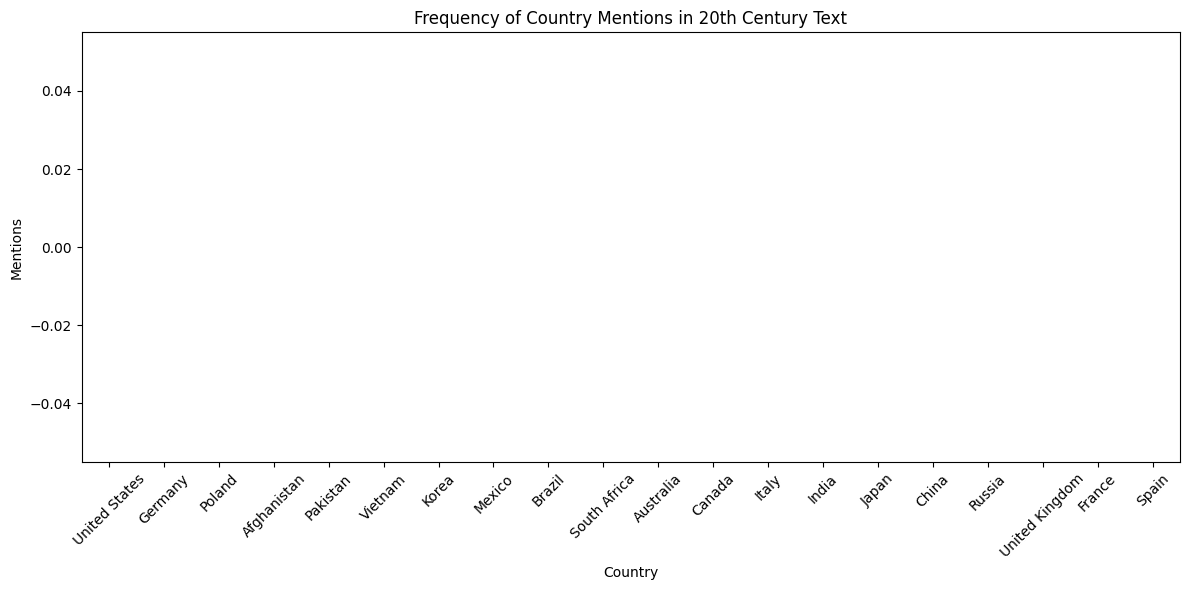

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_countries, x="Country", y="Mentions", hue="Country", legend=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Frequency of Country Mentions in 20th Century Text")
plt.xlabel("Country")
plt.ylabel("Mentions")
plt.tight_layout()
plt.show() 

##### The plot shows that none of the listed countries were mentioned in the text. This may suggest either a lack of specific country references or an issue with how country names were matched.